# Open Mini-Challenge: Steuerdaten einer Gemeinde im Kanton Solothurn
## Datenexploration
## 1. Daten einlesen & bereinigen

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

df_steuern = pd.read_csv('../Daten/Steuern_SO.csv', sep=';')
df_steuern.head()

,Jahr,Personen,Steuerbares Einkommen
0,1998,148329,6551307.0
1,1999,146773,6732949.0
2,2000,145022,6588062.0
3,2001,144154,7037941.0
4,2002,145781,7156045.0


In [3]:
df_bip = pd.read_csv('../Daten/BIP_SO.csv', sep=';')
df_bip.head()

,Jahr,BIP_SO,BIP_NWCH,BIP_CH
0,2008,16764.66925,88564.12220,614407.7193
1,2009,16119.66708,86806.37570,603039.0736
2,2010,16640.00445,88476.87018,624545.1186
3,2011,16917.99754,90486.47250,635738.7442
4,2012,17011.32618,90232.37095,643645.5891


- BIP_SO -> BIP Kanton Solothurn
- BIP_NWCH -> BIP Nordwestschweiz
- BIP_CH -> BIP Schweiz

In [4]:
df_population = pd.read_csv('../Daten/Bevölkerung_SO_Neu.csv', sep=';')

df_population['Jahr'] = pd.to_datetime(df_population['Datum'], dayfirst=True).dt.year

# convert df_population['Jahr'] to int
df_population['Jahr'] = df_population['Jahr'].astype(int)

# drop Datum column
df_population.drop('Datum', axis=1, inplace=True)

# reorder columns
df_population = df_population[['Jahr', 'KT_SO', 'Sonnenberg']]

df_population.head()

,Jahr,KT_SO,Sonnenberg
0,1970,226932,4679
1,1971,228511,4708
2,1972,229214,4490
3,1973,231066,4721
4,1974,231391,4543


## 2. Visualisierungen

### 2.1 Steuern Kanton Solothurn

#### 2.1.1 Steuerpflichtige Personen

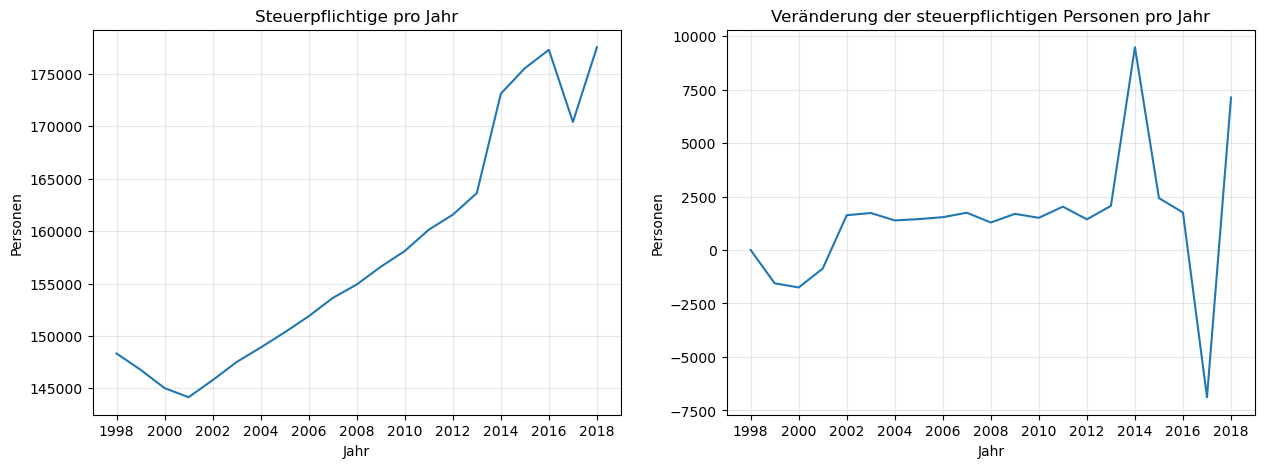

In [5]:
plot_lines(
    df=df_steuern,
    x=df_steuern['Jahr'],
    y=df_steuern['Personen'], 
    title1='Steuerpflichtige pro Jahr', 
    title2='Veränderung der steuerpflichtigen Personen pro Jahr',
    xlabel='Jahr',
    ylabel='Personen',
    x_ticks=df_steuern['Jahr'][::2]
)

Es ist interessant zu sehen, dass die Anzahl steuerpflichtige Personen in Kanton Solothurn im Jahr 2017 im Vergleich zu 2016 und 2018 viel tiefer ist.

**Alternative Fragestellung**: Wann geschieht in Kanton Solothurn das nächste Mal ein Einbruch der Anzahl Steuerpflichtige wie im Jahr 2017?

#### 2.1.2 Steuerbares Einkommen

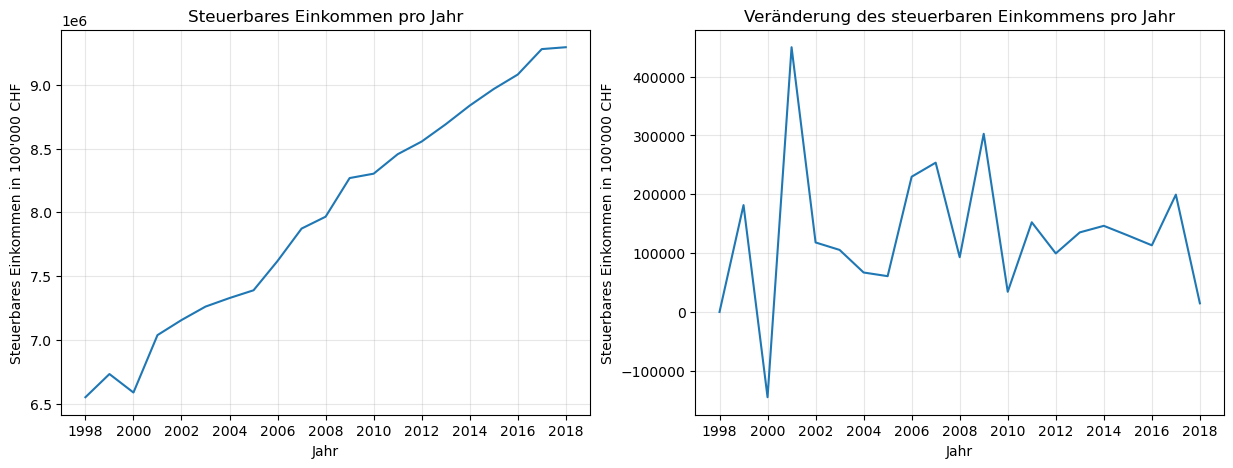

In [6]:
plot_lines(
    df=df_steuern,
    x=df_steuern['Jahr'],
    y=df_steuern['Steuerbares Einkommen'],
    title1='Steuerbares Einkommen pro Jahr',
    title2='Veränderung des steuerbaren Einkommens pro Jahr',
    xlabel='Jahr',
    ylabel='Steuerbares Einkommen in 100\'000 CHF',
    x_ticks = df_steuern['Jahr'][::2]
)


**Alternative Fragestellung**: Wann geschieht in Kanton Solothurn das nächste Mal ein Aufschwung des gesamten steuerbaren Einkommens wie vom Jahr 2000 zu 2001?

#### 2.1.3 Steuerbares Einkommen pro Person

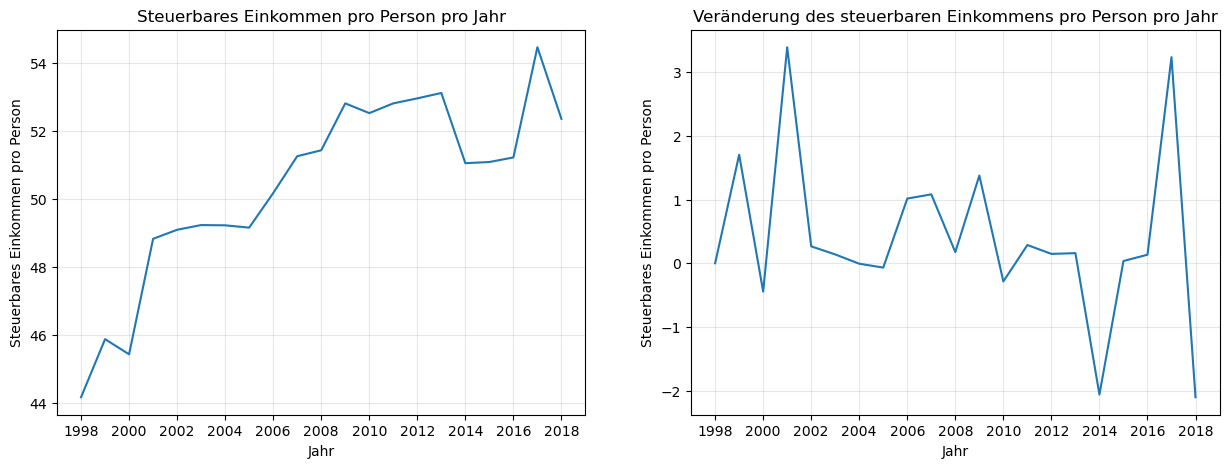

In [8]:
df_steuern['Steuerbares Einkommen pro Person'] = df_steuern['Steuerbares Einkommen'] / df_steuern['Personen']

plot_lines(
    df=df_steuern,
    x=df_steuern['Jahr'],
    y=df_steuern['Steuerbares Einkommen pro Person'],
    title1='Steuerbares Einkommen pro Person pro Jahr',
    title2='Veränderung des steuerbaren Einkommens pro Person pro Jahr',
    xlabel='Jahr',
    ylabel='Steuerbares Einkommen pro Person',
    x_ticks = df_steuern['Jahr'][::2]
)

Hier sehen wir fast jedes Jahr eine Steigung, aber die Steigung scheint sich immer mehr abzuflachen. Es ist interessant zu sehen, dass die Steigung im Jahr 2017 am tiefsten ist. Die starke Schwankungen der jährlichen Veränderungen zwischen 2013 und 2018 sind interessant.

#### 2.1.4 Korrelation

In [22]:
print(round(df_steuern['Steuerbares Einkommen'].corr(df_steuern['Personen']),3))

0.937


Die Korrelation zwischen der Anzahl steuerpflichtige Personen und dem steuerbaren Einkommen liegt bei einem stark positiven Wert von 0.937. Das heisst, wenn die Anzahl steuerpflichtige Personen steigt, steigt natürlich auch das steuerbare Einkommen.

### 2.2 BIP
#### 2.2.1 BIP Kanton Solothurn

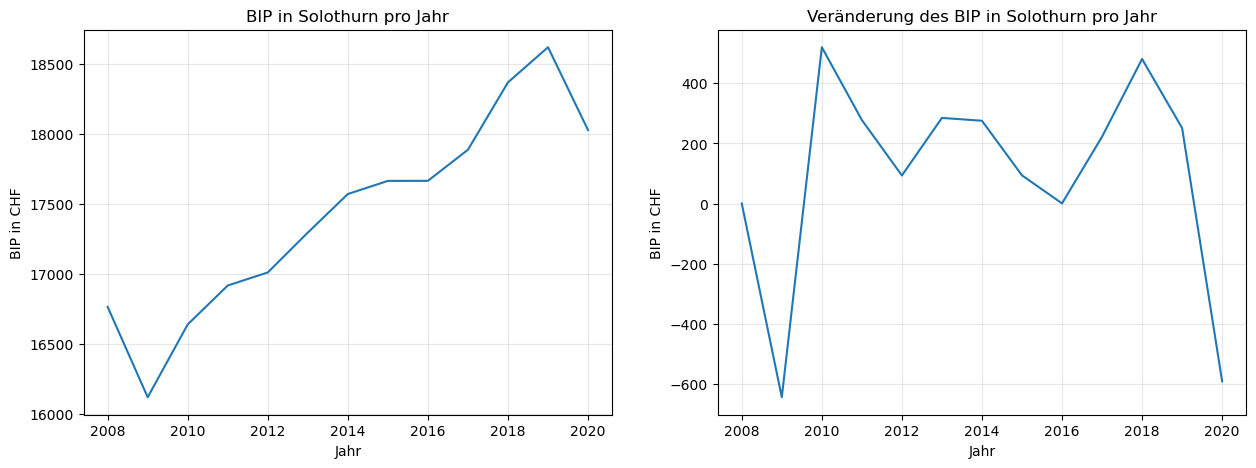

In [9]:
plot_lines(
    df=df_bip,
    x=df_bip['Jahr'],
    y=df_bip['BIP_SO'],
    title1='BIP in Solothurn pro Jahr',
    title2='Veränderung des BIP in Solothurn pro Jahr',
    xlabel='Jahr',
    ylabel='BIP in CHF',
    x_ticks = df_bip['Jahr'][::2]
)

#### 2.2.2 BIP Nordwestschweiz

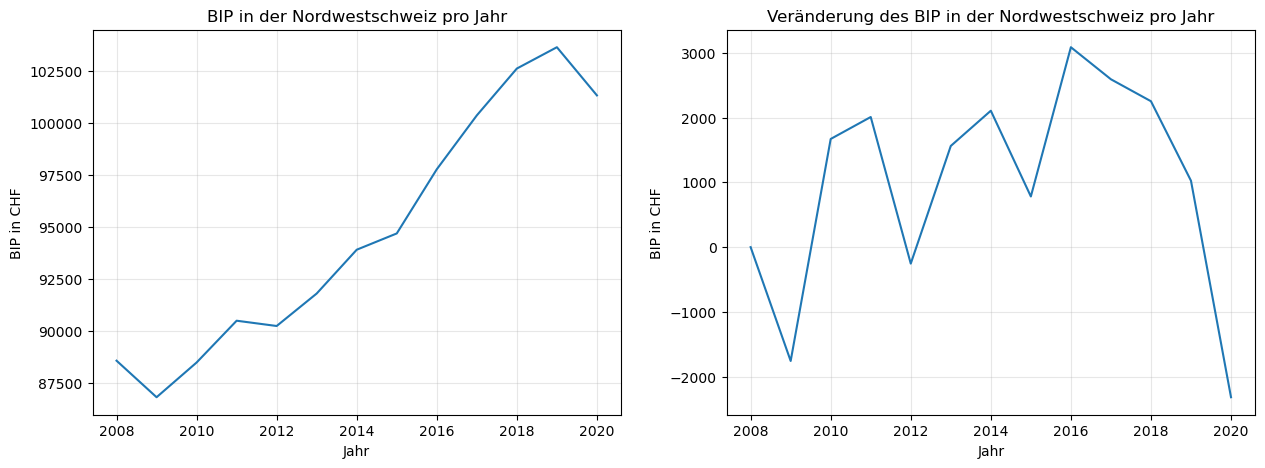

In [10]:
plot_lines(
    df=df_bip,
    x=df_bip['Jahr'],
    y=df_bip['BIP_NWCH'],
    title1='BIP in der Nordwestschweiz pro Jahr',
    title2='Veränderung des BIP in der Nordwestschweiz pro Jahr',
    xlabel='Jahr',
    ylabel='BIP in CHF',
    x_ticks = df_bip['Jahr'][::2]
)

#### 2.2.3 BIP Schweiz

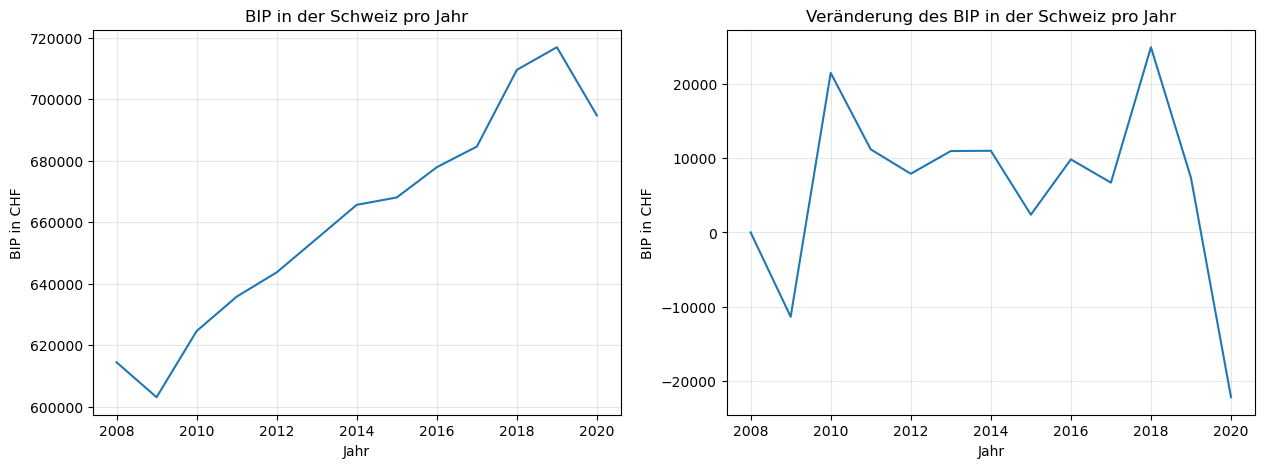

In [11]:
plot_lines(
    df=df_bip,
    x=df_bip['Jahr'],
    y=df_bip['BIP_CH'],
    title1='BIP in der Schweiz pro Jahr',
    title2='Veränderung des BIP in der Schweiz pro Jahr',
    xlabel='Jahr',
    ylabel='BIP in CHF',
    x_ticks = df_bip['Jahr'][::2]
)

Bei allen drei BIPs sehen wir sowie seit 2009 ein grosser Aufschwung, als auch bei 2020 ein grosser Einbruch. Dies ist sicherlich auf die Corona-Pandemie zurückzuführen.

**Alternative Fragestellung**: Wann geschieht das nächste Mal ein Einbruch des BIPs wie im Jahr 2020? Wann geschieht die nächste Pandemie?

#### 2.2.4 Korrelationen

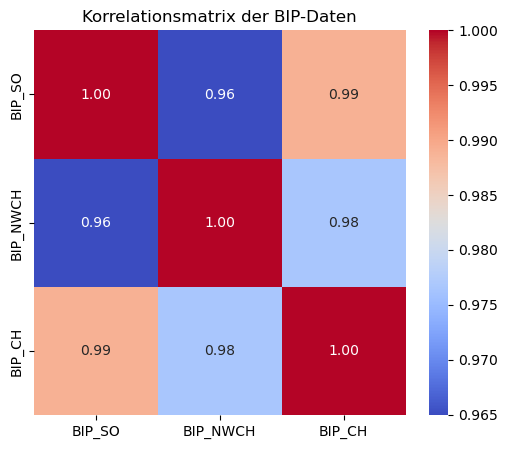

In [18]:
correlation_matrix = df_bip.drop('Jahr', axis=1).corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix der BIP-Daten')
plt.show()

Die Heatmap zeigt die Korrelationsmatrix für die BIP-Daten. Die Korrelationskoeffizienten liegen zwischen 0.96 und 0.99, was auf eine sehr starke positive Korrelation zwischen den BIP-Werten der verschiedenen Bereiche hinweist. Das bedeutet, dass wenn das BIP in einem Bereich steigt, wird es auch im anderen Bereich steigen.​​

### 2.3 Bevölkerung
#### 2.3.1 Bevölkerung Kanton Solothurn

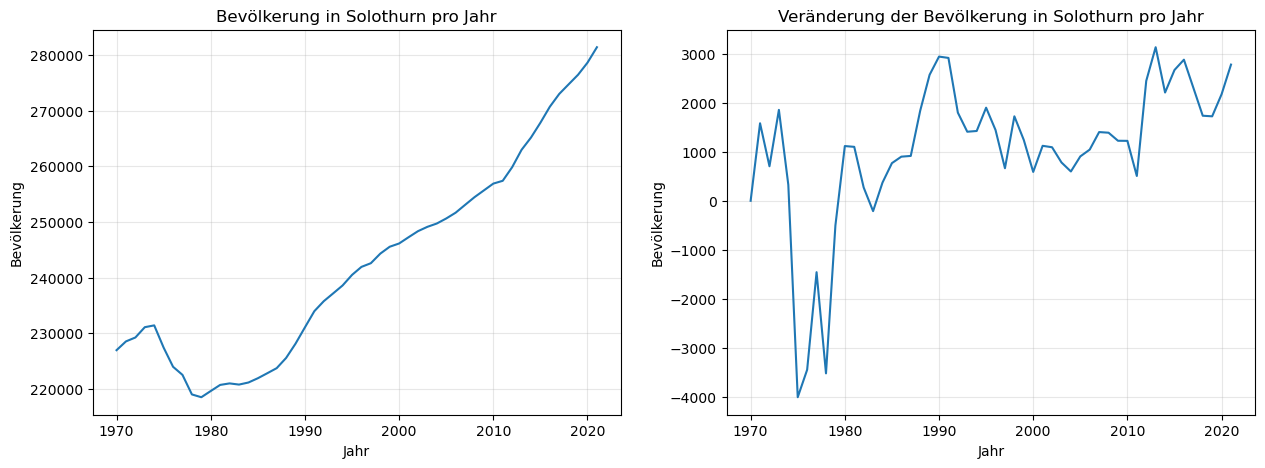

In [13]:
plot_lines(
    df=df_population,
    x=df_population['Jahr'],
    y=df_population['KT_SO'],
    title1='Bevölkerung in Solothurn pro Jahr',
    title2='Veränderung der Bevölkerung in Solothurn pro Jahr',
    xlabel='Jahr',
    ylabel='Bevölkerung',
    x_ticks = df_population['Jahr'][::10]
)

Wir sehen im Kanton Solothurn eine stetige Zunahme der Bevölkerung. Seit 2011 ist das Wachstum im Vergleich sehr stark.

**Alternative Fragestellung**: Wann geschieht in Kanton Solothurn das nächste Mal ein Einbruch der Bevölkerung wie in den Jahren von 1975 bis 1978?

#### 2.3.2 Bevölkerung Sonnenberg

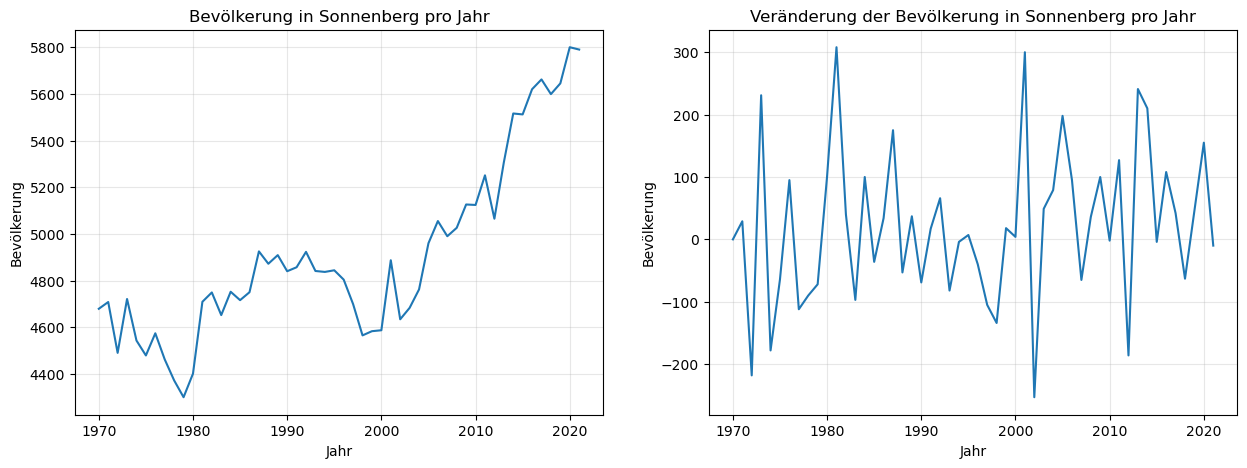

In [15]:
plot_lines(
    df=df_population,
    x=df_population['Jahr'],
    y=df_population['Sonnenberg'],
    title1='Bevölkerung in Sonnenberg pro Jahr',
    title2='Veränderung der Bevölkerung in Sonnenberg pro Jahr',
    xlabel='Jahr',
    ylabel='Bevölkerung',
    x_ticks = df_population['Jahr'][::10]
)

In der Gemeinde von Sonnenberg schwankt die Bevölkerung von Jahr zu Jahr recht stark. Wir sehen aber ein deutliches Wachstum seit 2000.

#### 2.3.3 Korrelation

In [24]:
print(round(df_population['KT_SO'].corr(df_population['Sonnenberg']),3))

0.866


Die Korrelation zwischen der Anzahl steuerpflichtige Personen und dem steuerbaren Einkommen liegt bei einem positiven Wert von 0.866.